# Modeling Projectile Motion Using Python

https://www.assignmentexpert.com/blog/modeling-projectile-motion-using-python/

In [32]:
#clear out everything
%reset -f

In [33]:
from math import sin, cos, radians
from matplotlib import pyplot as plt

In [34]:
class Cannon:
    def __init__(self, x0, y0, v, angle):
        """
        x0 and y0 are initial coordinates of the cannon
        v is the initial velocity
        angle is the angle of shooting in degrees
        """
        # current x and y coordinates of the missile
        self.x    = x0
        self.y    = y0
        # current value of velocity components
        self.vx  = v*cos(radians(angle))
        self.vy  = v*sin(radians(angle))

        # acceleration by x and y axes
        self.ax   = 0
        self.ay   = -9.80665 #m/s^2
        # start time
        self.time = 0

        # these list will contain discrete set of missile coordinates
        self.xarr = [self.x]
        self.yarr = [self.y]
        
        
    def updateVx(self, dt):
        self.vx = self.vx + self.ax*dt
        return self.vx
    def updateVy(self, dt):
        self.vy = self.vy + self.ay*dt
        return self.vy   
    
    
    def updateX(self, dt):
        self.x = self.x + 0.5*(self.vx + self.updateVx(dt))*dt
        return self.x
    def updateY(self, dt):
        self.y = self.y + 0.5*(self.vy + self.updateVy(dt))*dt
        return self.y
    
    def step(self, dt):
        self.xarr.append(self.updateX(dt))
        self.yarr.append(self.updateY(dt))
        self.time = self.time + dt

In [35]:
def makeShoot(x0, y0, velocity, angle):
    """
    Returns a tuple with sequential pairs of x and y coordinates
    """
    cannon = Cannon(x0, y0, velocity, angle)
    dt = 0.05 #s, time step
    t = 0 #s, initial time
    cannon.step(dt)

    ###### THE  INTEGRATION ######
    while cannon.y >= 0:
        cannon.step(dt)
        t = t + dt
    ##############################

    return (cannon.xarr, cannon.yarr)

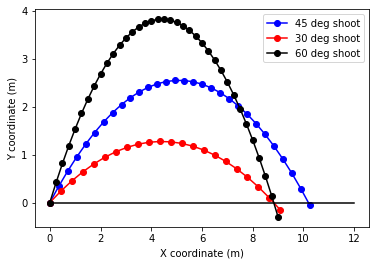

In [36]:
x0 = 0 #m
y0 = 0 #m
velocity = 10 #m/s
x45, y45 = makeShoot(x0, y0, velocity, 45)
x30, y30 = makeShoot(x0, y0, velocity, 30)
x60, y60 = makeShoot(x0, y0, velocity, 60)
plt.plot(x45, y45, 'bo-', x30, y30, 'ro-', x60, y60, 'ko-',
    [0, 12], [0, 0], 'k-' # ground
    )
plt.legend(['45 deg shoot', '30 deg shoot', '60 deg shoot'])
plt.xlabel('X coordinate (m)')
plt.ylabel('Y coordinate (m)')
plt.show()

Convert to units of ft

In [58]:
x30_ft = []
y30_ft = []

x45_ft = [] #initialize a new list to hold values in ft
y45_ft = [] #initialize a new list to hold values in ft

x60_ft = []
y60_ft = []

for intIndex in range(len(x45)):
    #print(intIndex) #debugging
    #x45_ft[intIndex] = x45[intIndex]*10
    x45_ft.append(x45[intIndex]*3.28084) #convert m to ft
    y45_ft.append(y45[intIndex]*3.28084) #convert m to ft
    
for intIndex in range(len(x30)):
    x30_ft.append(x30[intIndex]*3.28084) #convert m to ft
    y30_ft.append(y30[intIndex]*3.28084) #convert m to ft    
    
for intIndex in range(len(x60)):
    x60_ft.append(x60[intIndex]*3.28084) #convert m to ft
    y60_ft.append(y60[intIndex]*3.28084) #convert m to ft    

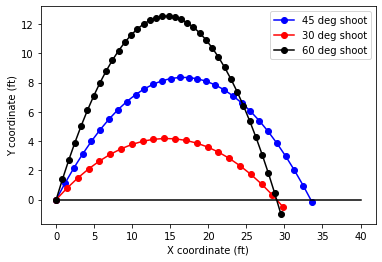

In [61]:
x45, y45 = makeShoot(x0, y0, velocity, 45)
x30, y30 = makeShoot(x0, y0, velocity, 30)
x60, y60 = makeShoot(x0, y0, velocity, 60)
plt.plot(x45_ft, y45_ft, 'bo-', 
         x30_ft, y30_ft, 'ro-', 
         x60_ft, y60_ft, 'ko-',
         [0, 40], [0, 0], 'k-' # ground
        )
plt.legend(['45 deg shoot', '30 deg shoot', '60 deg shoot'])
plt.xlabel('X coordinate (ft)')
plt.ylabel('Y coordinate (ft)')
plt.show()